# DAP 3

## Import data set

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./processeddata/poverty.csv", index_col=0)

In [4]:
col_names = list(data.columns.values)[1:]
class_names = ["low_poverty", "high_poverty" ]

In [5]:
# split the data into the classifier and the other attributes
y = data[["poverty"]]
X = data.drop(columns=["poverty"])

## k-cross validation

In [6]:
# split the dataset
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [7]:
# create the splits
splits = {}
cv_splits = {}
kf= KFold(n_splits=10, shuffle=True, random_state=42)
scaler = MinMaxScaler()

for train_percent in [0.5, 0.6, 0.7, 0.8, 0.9]:
    # create train test split for certain percentage
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_percent, random_state=42)
    
    # normalize data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    splits[train_percent] = [X_train, X_test, y_train, y_test]
    
    # create the cross validation split for the given train test split
    cv_splits[train_percent] = [x for x in kf.split(X_train)]

In [8]:
# create a dictionary to store the cvs of each train_percent
cvs = {"entropy": {}, "gini": {}, "knn": {}, "nb": {}}

In [9]:
# decision tree entropy
for train_percent in cv_splits:
    entropy_params = {
        "max_depth": [5, 6, 7, 8, 9, 10]
    }
    
    entropy_cv = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), entropy_params, 
                                  n_jobs=-1, cv=cv_splits[train_percent], return_train_score=True)
    
    X_train, y_train = splits[train_percent][0], splits[train_percent][2]
    entropy_cv.fit(X_train, y_train)
    
    cvs["entropy"][train_percent] = entropy_cv

In [8]:
# decision tree gini
for train_percent in cv_splits:
    gini_params = {
        "max_depth": [5, 6, 7, 8, 9, 10]
    }
    
    gini_cv = GridSearchCV(DecisionTreeClassifier(criterion="gini"), gini_params, 
                                  n_jobs=-1, cv=cv_splits[train_percent], return_train_score=True)
    
    X_train, y_train = splits[train_percent][0], splits[train_percent][2]
    gini_cv.fit(X_train, y_train)
    
    cvs["gini"][train_percent] = gini_cv

In [ ]:
# k-nn 
for train_percent in cv_splits:
    knn_params = {
        "n_neighbors": [35, 41, 45, 51, 55]
    }
    
    knn_cv = GridSearchCV(KNeighborsClassifier(n_jobs=-1), knn_params, n_jobs=1,
                         cv=cv_splits[train_percent], return_train_score=True)
    
    X_train, y_train = splits[train_percent][0], splits[train_percent][2]
    knn_cv.fit(X_train, y_train)
    
    cvs["knn"][train_percent] = knn_cv

In [ ]:
# Naive Bayes
for train_percent in cv_splits: 
    nb_params = {}
    nb_cv = GridSearchCV(GaussianNB(), nb_params, n_jobs=-1,
                         cv=cv_splits[train_percent], return_train_score=True)
    
    X_train, y_train = splits[train_percent][0], splits[train_percent][2]
    nb_cv.fit(X_train, y_train)
    
    cvs["nb"][train_percent] = nb_cv

In [10]:
# find best score for entropy decision tree
for percent, cv in zip(cvs["entropy"].keys(), cvs["entropy"].values()):
    print(percent, cv.best_score_, cv.best_params_)

0.5 0.8078794983898643 {'max_depth': 6}
0.6 0.8114702606098442 {'max_depth': 6}
0.7 0.8074757006830126 {'max_depth': 7}
0.8 0.8045306238032557 {'max_depth': 7}
0.9 0.8082845431344522 {'max_depth': 8}


In [12]:
# find best score for gini decision tree
for percent, cv in zip(cvs["gini"].keys(), cvs["gini"].values()):
    print(percent, cv.best_score_, cv.best_params_)

0.5 0.7995247161695226 {'max_depth': 6}
0.6 0.8071264775847788 {'max_depth': 7}
0.7 0.8090097065377497 {'max_depth': 6}
0.8 0.8053448000484664 {'max_depth': 7}
0.9 0.8080293691251417 {'max_depth': 7}


In [13]:
# find best score for knn
for percent, cv in zip(cvs["knn"].keys(), cvs["knn"].values()):
    print(percent, cv.best_score_, cv.best_params_)

0.5 0.7984533883365066 {'n_neighbors': 41}
0.6 0.7988259295982112 {'n_neighbors': 45}
0.7 0.8014016058262008 {'n_neighbors': 45}
0.8 0.8007947162419429 {'n_neighbors': 55}
0.9 0.8015156328076104 {'n_neighbors': 51}


In [14]:
# find best score for Naive Bayes
for percent, cv in zip(cvs["nb"].keys(), cvs["nb"].values()):
    print(percent, cv.best_score_, cv.best_params_)

0.5 0.7921687469148863 {}
0.6 0.7916719914802981 {}
0.7 0.7813663670954905 {}
0.8 0.7824979530279581 {}
0.9 0.7822287819747139 {}


In [11]:
def graph_cv(cv):
    results = pd.DataFrame(data=cv.cv_results_)
    
    # get the parameters of the best run
    best = results.loc[cv.best_index_]
    best_params = best["params"]
    
    graph_param = list(best_params.keys())[0]
    results.plot.line(x=f"param_{graph_param}", y=["mean_train_score", "mean_test_score"])
    plt.show()

0.5


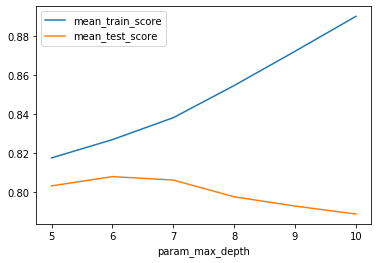

0.6


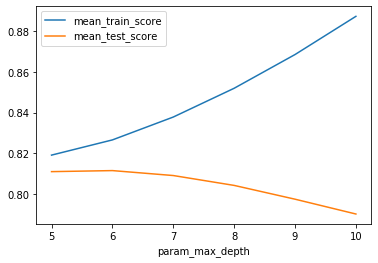

0.7


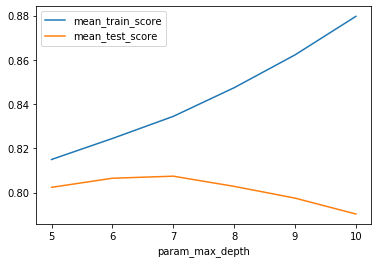

0.8


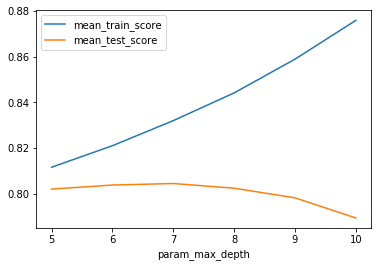

0.9


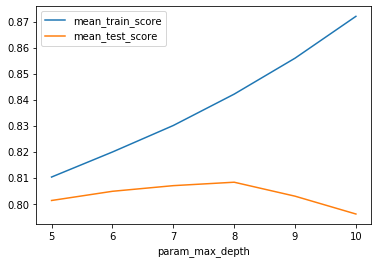

In [12]:
# optimal parameters for entropy tree
for percent in [0.5, 0.6, 0.7, 0.8, 0.9]:
    print(percent, )
    graph_cv(cvs["entropy"][percent])

0.5


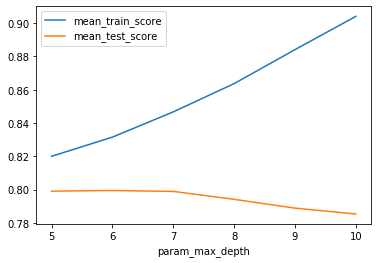

0.6


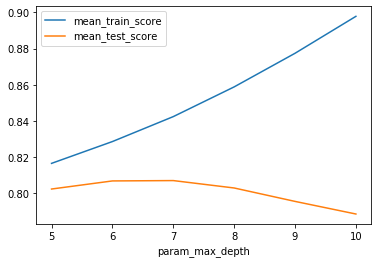

0.7


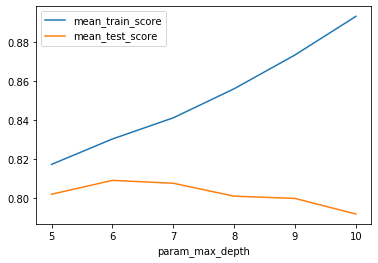

0.8


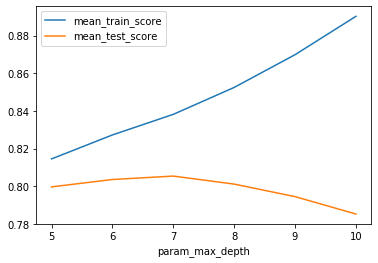

0.9


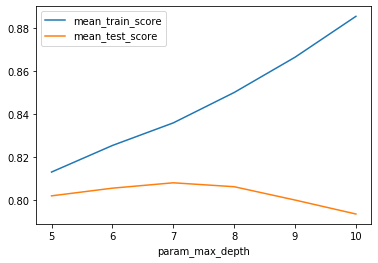

In [17]:
# optimal parameters for gini index tree
for percent in [0.5, 0.6, 0.7, 0.8, 0.9]:
    print(percent, )
    graph_cv(cvs["gini"][percent])

0.5


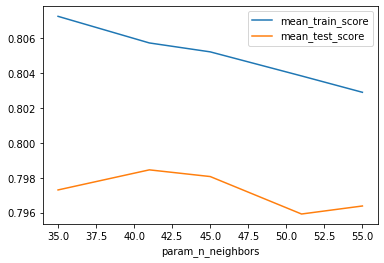

0.6


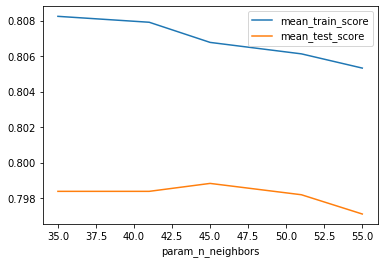

0.7


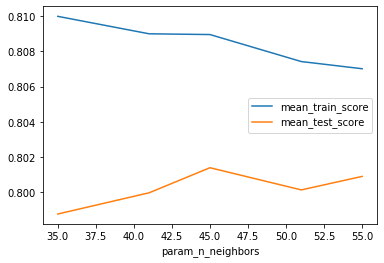

0.8


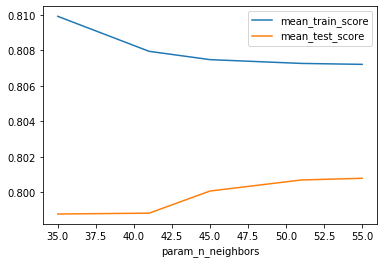

0.9


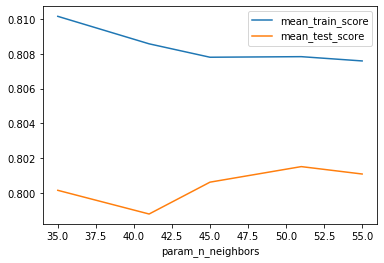

In [18]:
# optimal parameters for knn
for percent in [0.5, 0.6, 0.7, 0.8, 0.9]:
    print(percent, )
    graph_cv(cvs["knn"][percent])

In [19]:
# find the optimal training size for each model
def graph_overfit(cv):
    scores = {}
    
    for percent in cv:
        cv_results = pd.DataFrame(data=cv[percent].cv_results_)
        best_index = cv[percent].best_index_
        train_score = cv_results.loc[best_index]["mean_train_score"]
        test_score = cv_results.loc[best_index]["mean_test_score"]
        scores[percent] = {"train_score": train_score, "test_score": test_score}
        
    result = pd.DataFrame(data=scores).transpose()
    result.plot.line(y=["train_score", "test_score"])

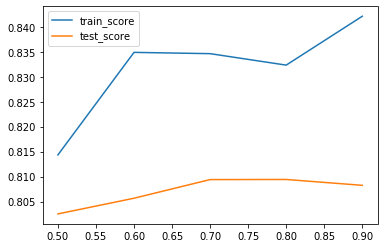

In [20]:
graph_overfit(cvs["entropy"])

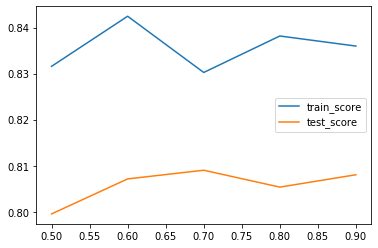

In [21]:
graph_overfit(cvs["gini"])

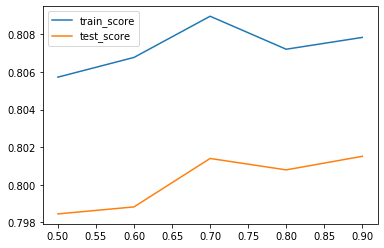

In [22]:
graph_overfit(cvs["knn"])

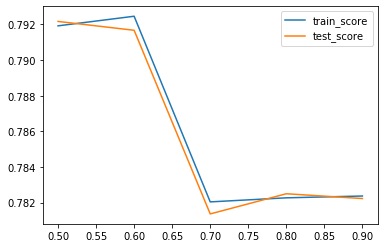

In [23]:
graph_overfit(cvs["nb"])

## Optimal training set sizes:
Decision Tree: 0.7

k-NN: 0.7

naive:bayes: 0.6

# Train models on full training data

In [25]:
# train decision trees
X_train, X_test, y_train, y_test = splits[0.7]
entropy_tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
entropy_tree.fit(X_train, y_train)

gini_tree = DecisionTreeClassifier(criterion="gini", max_depth=6)
gini_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train, y_train)

C:\Users\michl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

In [28]:
nb = GaussianNB()
nb.fit(splits[0.6][0], splits[0.6][2])

C:\Users\michl\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

## Model Evaluation

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, plot_confusion_matrix, plot_roc_curve

Entropy metrics
Performance results
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      4698
         1.0       0.78      0.70      0.74      3132

    accuracy                           0.80      7830
   macro avg       0.80      0.78      0.79      7830
weighted avg       0.80      0.80      0.80      7830

med_household_income 0.6867804720994165
ave_household_size 0.08266945453584423
p_grapi_35 0.05139996832107387
total_pop 0.04102742530777533
p_highschool_plus 0.038987973800149026
p_unemployed 0.019535680382498245
mean_household_income 0.01687268008260941
p_race_am_indian 0.008458013041043036
p_household_renter_occupied 0.007603373739003603
p_household_owner_occupied 0.006567784999748906
p_race_white 0.005775680284276662
p_grapi_20-24.9 0.004312716715014648
p_race_hispanic 0.004084762774099576
p_occ_sales_office 0.0034783728785485082
p_grapi_30-34.9 0.0031519519617386033
p_occ_service 0.0029893124504753324
p_race_black 0.002910093

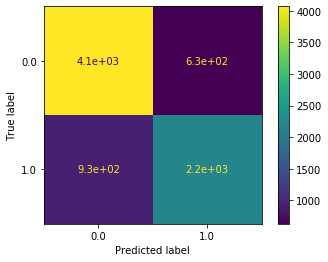

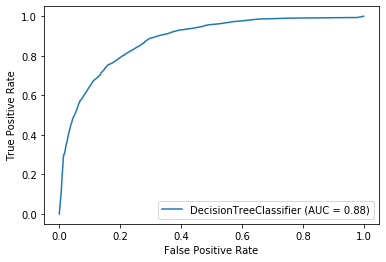

In [45]:
entropy_pred = entropy_tree.predict(X_test)

print("Entropy metrics")
# confusion matrix
plot_confusion_matrix(entropy_tree, X_test, y_test)

# performance results summary
entropy_report = classification_report(y_test, entropy_pred)
print("Performance results"),
print(entropy_report)

# roc curve
plot_roc_curve(entropy_tree, X_test, y_test)

# important features
for importance, name in sorted(zip(entropy_tree.feature_importances_, col_names), reverse=True):
    print(name, importance)

Gini metrics:
Performance results
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      4698
         1.0       0.77      0.75      0.76      3132

    accuracy                           0.81      7830
   macro avg       0.80      0.80      0.80      7830
weighted avg       0.81      0.81      0.81      7830

med_household_income 0.7580635297327737
ave_household_size 0.09626173532847387
p_grapi_35 0.03595990490536443
total_pop 0.019352435005391994
p_highschool_plus 0.017787667691968864
p_race_white 0.01302471521819478
p_unemployed 0.012686132361957604
p_race_hispanic 0.011275989845579032
mean_household_income 0.01030007311948601
p_household_owner_occupied 0.007657838567813512
p_household_renter_occupied 0.004700730307652122
p_race_am_indian 0.003398771371124892
p_grapi_20-24.9 0.002685854822681476
p_occ_business_science_art 0.0017208388843431264
p_native_born 0.0014949087440852401
p_occ_sales_office 0.001315185838052802
p_occ_service 0.

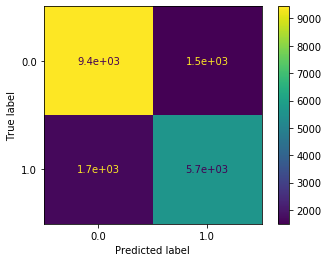

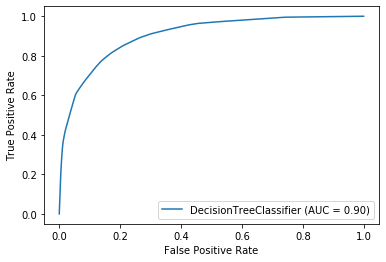

In [47]:
gini_pred = gini_tree.predict(X_test)

print("Gini metrics:")
# confusion matrix
confusion_mat = confusion_matrix(y_test, gini_pred)
plot_confusion_matrix(gini_tree, X_train, y_train)

# performance results summary
gini_report = classification_report(y_test, gini_pred)
print("Performance results"),
print(gini_report)

# roc curve
plot_roc_curve(gini_tree, X_train, y_train)

# feature importances
for importance, name in sorted(zip(gini_tree.feature_importances_, col_names), reverse=True):
    print(name, importance)

k-NN metrics
Performance results
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84      4698
         1.0       0.77      0.70      0.73      3132

    accuracy                           0.80      7830
   macro avg       0.79      0.78      0.79      7830
weighted avg       0.80      0.80      0.80      7830



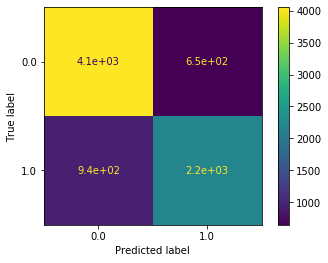

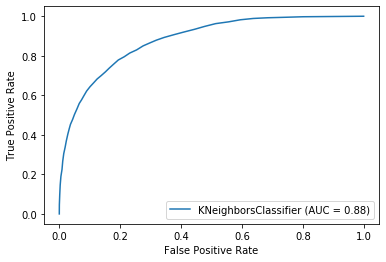

In [48]:
knn_pred = knn.predict(X_test)

print("k-NN metrics")
# confusion matrix
plot_confusion_matrix(knn, X_test, y_test)

# performance results summary
knn_report = classification_report(y_test, knn_pred)
print("Performance results"),
print(knn_report)

# roc curve
plot_roc_curve(knn, X_test, y_test)

Naive Bayes metrics
Performance results
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83      4698
         1.0       0.78      0.62      0.69      3132

    accuracy                           0.78      7830
   macro avg       0.78      0.75      0.76      7830
weighted avg       0.78      0.78      0.77      7830



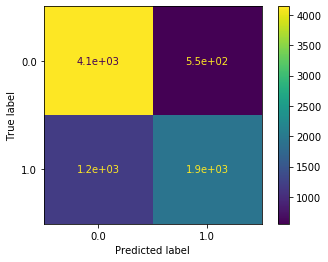

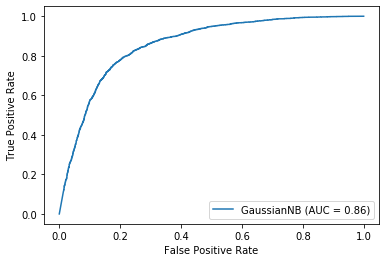

In [50]:
nb_pred = nb.predict(X_test)

print("Naive Bayes metrics")
# confusion matrix
plot_confusion_matrix(nb, X_test, y_test)

# performance results summary
nb_report = classification_report(y_test, nb_pred)
print("Performance results"),
print(nb_report)

# roc curve
plot_roc_curve(nb, X_test, y_test)